## Author : Sairaj Bhise
-------------------------------------
### The Sparks Foundation - GRIPNOV20
-------------------------------------
Task 2 - From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
## First lets import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

%matplotlib inline

In [2]:
## Lets import the datasets 
## for this problem we have 'iris' dataset

iris = datasets.load_iris()
iris_df =  pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Lets find the optimal number of clusters for k-mean classification
x = np.array(iris_df)

In [5]:
# now lets classify using k-means
from sklearn.cluster import  KMeans
wcss = []   # Within-Cluster-Sum-of-Squares initialised to zero
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

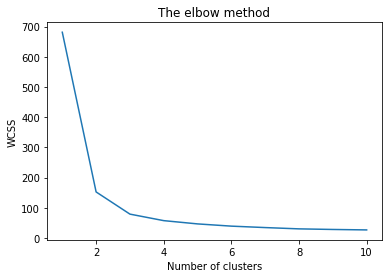

In [6]:
# now lets plot the graphs 
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [7]:
## now we have found out the number of cluster lets fit and predict the data
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

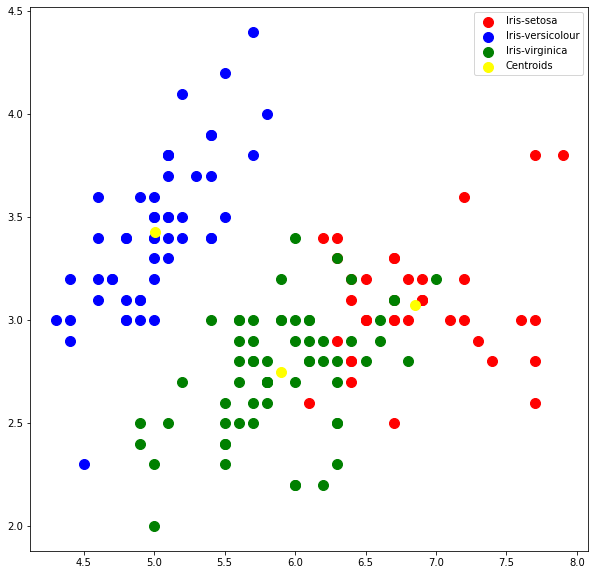

In [8]:
# Visualising the clusters - On the first two columns
fig = plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Thank You !!